#If you had to move to Canada, where would it be safer to live?



Every year, more and more people (students, workers, refugees, etc.) migrate to Canada. Over time, Canada has become one of the top choices for relocation due to its safety, quality of life, and multiculturalism.

This analysis aims to find which province in Canada is the safest in order to make an informed decision about moving.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Yael/DEV/0. Projects-Data/5. Crimes Canada/Crimes_report_Canada_2021.csv')

In [38]:
df.head(3)

,CITY,TOWN,Population,CSI_Violent,%_CHNG_Violent,CSI_NoViolent,%_CHNG_NoViolent
0,Toronto,ON,"2,794,396",88.3,-2.40%,45.2,-1.60%
1,Montréal,QC,"1,762,949",105.3,14.60%,59.9,2.70%
2,Calgary,AB,"1,305,550",86,6.50%,70,-13.90%


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CITY              521 non-null    object
 1   TOWN              521 non-null    object
 2   Population        521 non-null    object
 3   CSI_Violent       521 non-null    object
 4   %_CHNG_Violent    521 non-null    object
 5   CSI_NoViolent     521 non-null    object
 6   %_CHNG_NoViolent  521 non-null    object
dtypes: object(7)
memory usage: 28.6+ KB


In [40]:
df['CSI_Violent'] = df['CSI_Violent'].str.replace(',', '')
df['CSI_Violent'] = df['CSI_Violent'].astype(np.float)

<ipython-input-40-1eff3207d6b2>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['CSI_Violent'] = df['CSI_Violent'].astype(np.float)


In [41]:
df['CSI_NoViolent'] = df['CSI_NoViolent'].str.replace(',', '')
df['CSI_NoViolent'] = df['CSI_NoViolent'].astype(float)

In [42]:
df['%_CHNG_Violent'] = df['%_CHNG_Violent'].str.replace('%', '')
df['%_CHNG_Violent'] = df['%_CHNG_Violent'].astype(np.float)

<ipython-input-42-7bbfd448ebd8>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['%_CHNG_Violent'] = df['%_CHNG_Violent'].astype(np.float)


In [43]:
df['%_CHNG_NoViolent'] = df['%_CHNG_NoViolent'].str.replace('%', '')
df['%_CHNG_NoViolent'] = df['%_CHNG_NoViolent'].astype(np.float)

<ipython-input-43-5f1739b20318>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['%_CHNG_NoViolent'] = df['%_CHNG_NoViolent'].astype(np.float)


In [44]:
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].astype(int)

In [45]:
df

,CITY,TOWN,Population,CSI_Violent,%_CHNG_Violent,CSI_NoViolent,%_CHNG_NoViolent
0,Toronto,ON,2794396,88.3,-2.4,45.2,-1.6
1,Montréal,QC,1762949,105.3,14.6,59.9,2.7
2,Calgary,AB,1305550,86.0,6.5,70.0,-13.9
3,Ottawa,ON,1017449,64.3,13.8,45.0,-0.3
4,Edmonton,AB,981280,123.8,-3.8,99.6,-10.5
...,...,...,...,...,...,...,...
516,Sheshatshiu,NL,1049,1356.6,50.4,1022.6,9.4
517,Sault Ste. Marie (Laird),ON,1047,31.0,337.4,28.9,-58.1
518,Grenville County (Merrickville-Wolford),ON,1036,18.6,-20.7,25.6,58.5
519,Manning,AB,1027,59.6,-48.0,122.1,13.8


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CITY              521 non-null    object 
 1   TOWN              521 non-null    object 
 2   Population        521 non-null    int64  
 3   CSI_Violent       521 non-null    float64
 4   %_CHNG_Violent    521 non-null    float64
 5   CSI_NoViolent     521 non-null    float64
 6   %_CHNG_NoViolent  521 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 28.6+ KB


<ipython-input-47-dabc7eaf9569>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method="pearson")


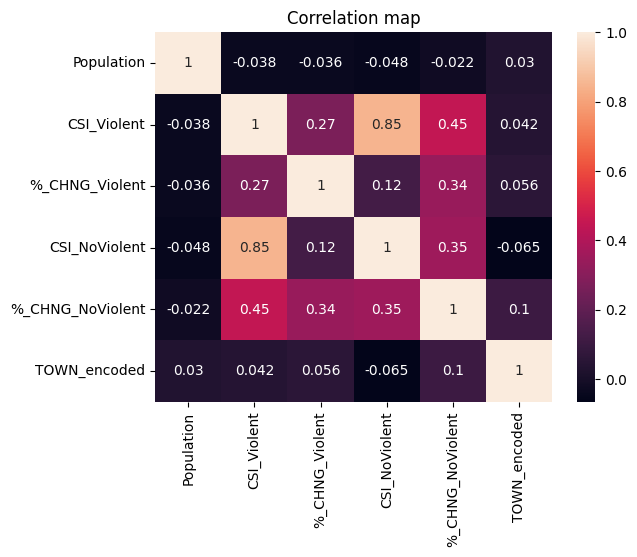

In [47]:
le = LabelEncoder()
df['TOWN_encoded'] = le.fit_transform(df['TOWN'])

correlation = df.corr(method="pearson")
sns.heatmap(correlation,annot=True)
plt.title('Correlation map')
#plt.xlabel('')
#plt.ylabel('')
plt.show()

In [48]:
print("Towns at Canada to study")
print(df['TOWN'].unique())
print("Number of towns to study")
print(df['TOWN'].nunique())

Towns at Canada to study
['ON' 'QC' 'AB' 'MB' 'BC' 'NS' 'SK' 'NL' 'NB' 'PEI' 'YT' 'NWT' 'NU']
Number of towns to study
13


In [49]:
df_grouped = df.groupby('TOWN')['CSI_Violent'].mean().reset_index()
df_sample = df.groupby('TOWN')['Population'].sum().reset_index()
df_grouped['Population'] = df_sample['Population']
df_grouped

,TOWN,CSI_Violent,Population
0,AB,135.815909,3323048
1,BC,113.189535,3605446
2,MB,236.287879,978996
3,NB,91.223529,372659
4,NL,146.736842,291432
5,NS,108.580000,526340
6,NU,570.633333,16621
7,NWT,410.475000,26803
8,ON,84.927097,8448323
9,PEI,55.900000,87970


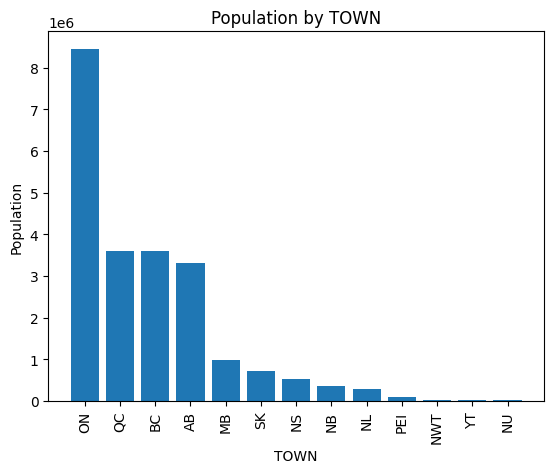

In [50]:
df_sorted = df_grouped.sort_values(by='Population', ascending=False)

plt.bar(df_sorted['TOWN'], df_sorted['Population'])
plt.xlabel('TOWN')
plt.ylabel('Population')
plt.title('Population by TOWN')
plt.xticks(rotation=90)

plt.show()

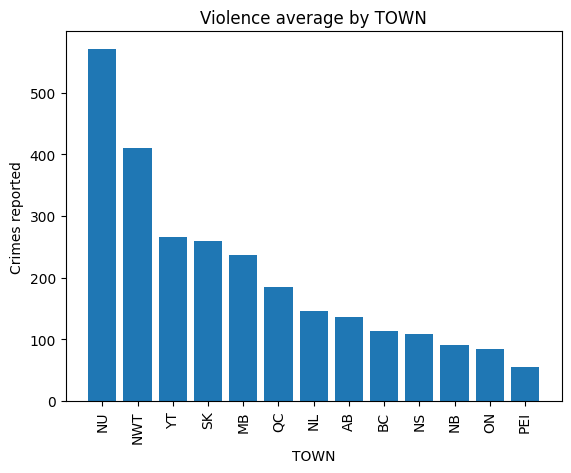

In [51]:
df_sorted = df_grouped.sort_values(by='CSI_Violent', ascending=False)

plt.bar(df_sorted['TOWN'], df_sorted['CSI_Violent'])
plt.xlabel('TOWN')
plt.ylabel('Crimes reported')
plt.title('Violence average by TOWN')
plt.xticks(rotation=90)

plt.show()

As we can see, the provinces with the highest crime rates are NU (Nunavut) and NWT (Northwest Territories). At first glance, this might be alarming and a sign to avoid living there. However, it's important to mention a crucial factor: these two provinces are also among the smallest in Canada.

Most crime surveys and reports do not emphasize the relationship between population size and crime rates. This may not be apparent at first, but what it means is that in a small population, even a small number of crimes can significantly impact the crime rate per capita. For example, if 10 out of 100 people commit a crime, the crime rate appears high. In contrast, in large populations like Ontario or Quebec, this relationship seems less pronounced, with a ratio of something like 10 out of 100,000.

However, in many cases, small provinces like NU (Nunavut) or NWT (Northwest Territories) could still be options to consider for relocation. It's important to note that these are very small cities.

Considering the above, in terms of safety, it would be best to live in **Ontario**. Its large population is reflected in its mega-cities, thriving businesses, multiculturalism, and low crime rate.

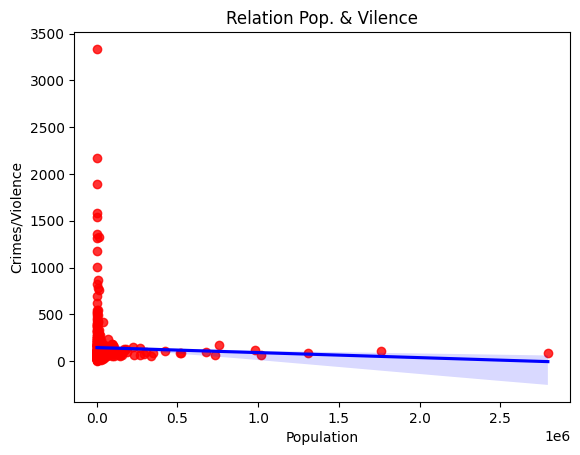

In [52]:
sns.regplot(x='Population', y='CSI_Violent', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Relation Pop. & Vilence')
plt.xlabel('Population')
plt.ylabel('Crimes/Violence')
plt.show()

Source:

https://canadacrimeindex.com/crime-severity-index?sort=population&min_population=0&province=#data-source